<H3>IRIS CLASSIFICATION</h3>

<h5>CodSoft INTERNSHIP</h5>

<h5>TASK-3</h5>

In [58]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

READ THE DATASET USING PANDAS MODULE

In [4]:
df=pd.read_csv('IRIS.csv')

In [5]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
#No.of columns in the dataset
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [9]:
#no.of rows and columns in the dataset
print("shape of the dataset:",df.shape,"\n")
# Checking the data types of the columns
print("Data types of the columns:",df.dtypes,"\n")
#sum of the null values in each column
print("Sum of the null values in the dataset:\n",df.isnull().sum())

shape of the dataset: (150, 5) 

Data types of the columns: sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object 

Sum of the null values in the dataset:
 sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


In [10]:
df['species'].value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [11]:
#since there are no missing value check for the duplicated values
df.duplicated().sum()

3

In [13]:
df=df.drop_duplicates()

EXPLORATORY DATA ANALYTICS

<Axes: >

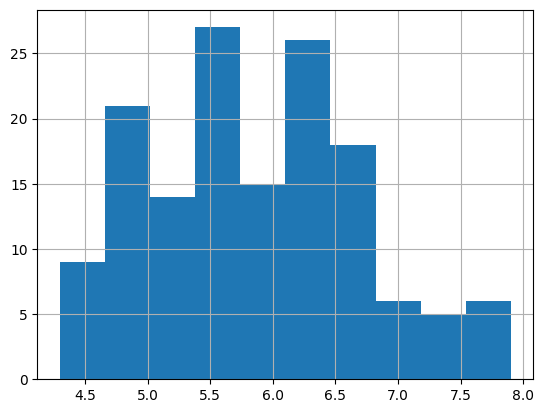

In [15]:
# histograms
df['sepal_length'].hist()

<Axes: >

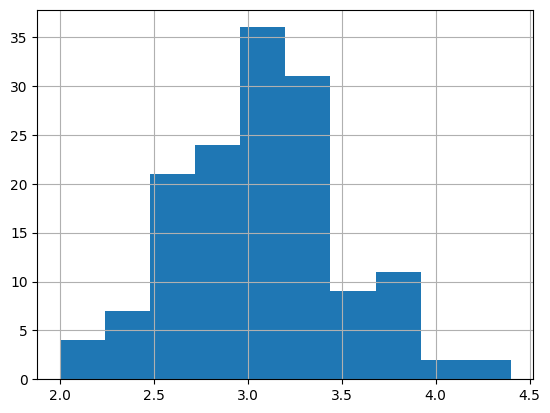

In [16]:
df['sepal_width'].hist()

<Axes: >

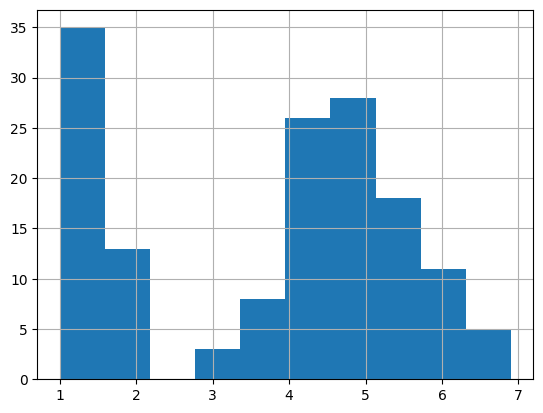

In [17]:
df['petal_length'].hist()

<Axes: >

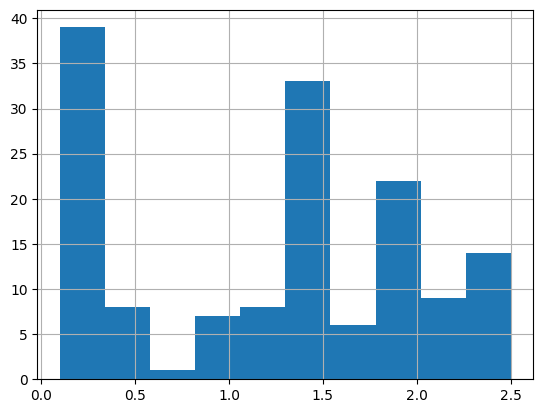

In [19]:
df['petal_width'].hist()

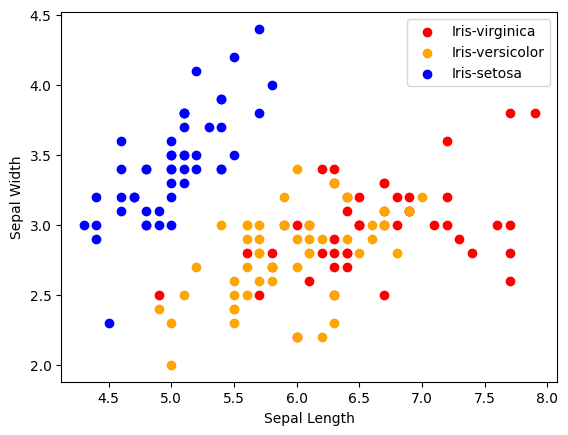

In [22]:
# create list of colors and class labels
colors = ['red', 'orange', 'blue']
species = ['Iris-virginica', 'Iris-versicolor', 'Iris-setosa']

for i in range(3):
    # filter data on each class
    x = df[df['species'] == species[i]]
    # plot the scatter plot
    plt.scatter(x['sepal_length'], x['sepal_width'], c = colors[i], label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()

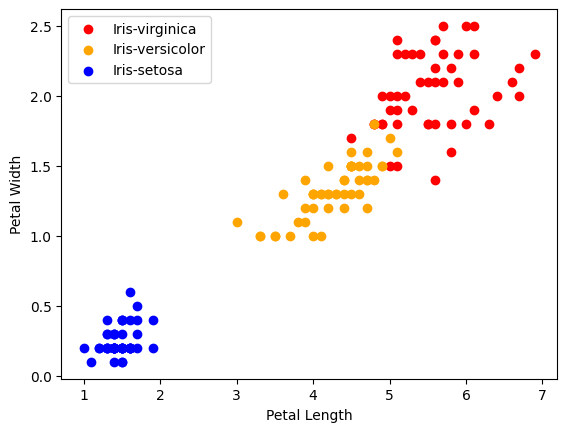

In [23]:
for i in range(3):
    # filter data on each class
    x = df[df['species'] == species[i]]
    # plot the scatter plot
    plt.scatter(x['petal_length'], x['petal_width'], c = colors[i], label=species[i])
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend()

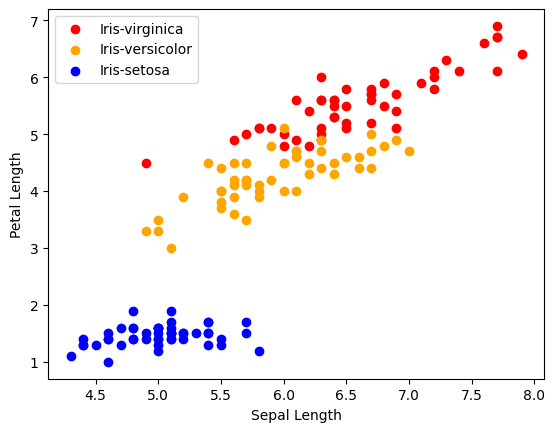

In [24]:

for i in range(3):
    # filter data on each class
    x = df[df['species'] == species[i]]
    # plot the scatter plot
    plt.scatter(x['sepal_length'], x['petal_length'], c = colors[i], label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Petal Length")
plt.legend()

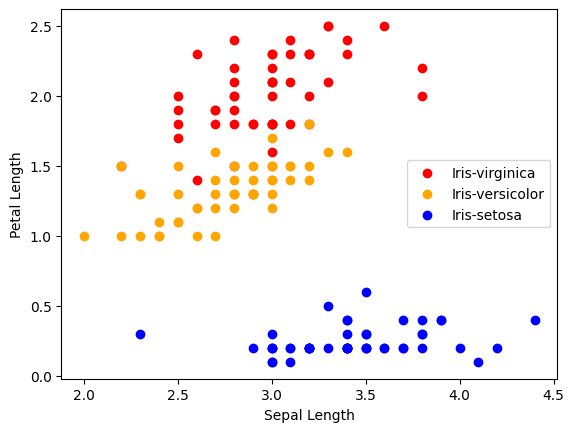

In [25]:

for i in range(3):
    # filter data on each class
    x = df[df['species'] == species[i]]
    # plot the scatter plot
    plt.scatter(x['sepal_width'], x['petal_width'], c = colors[i], label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Petal Length")
plt.legend()

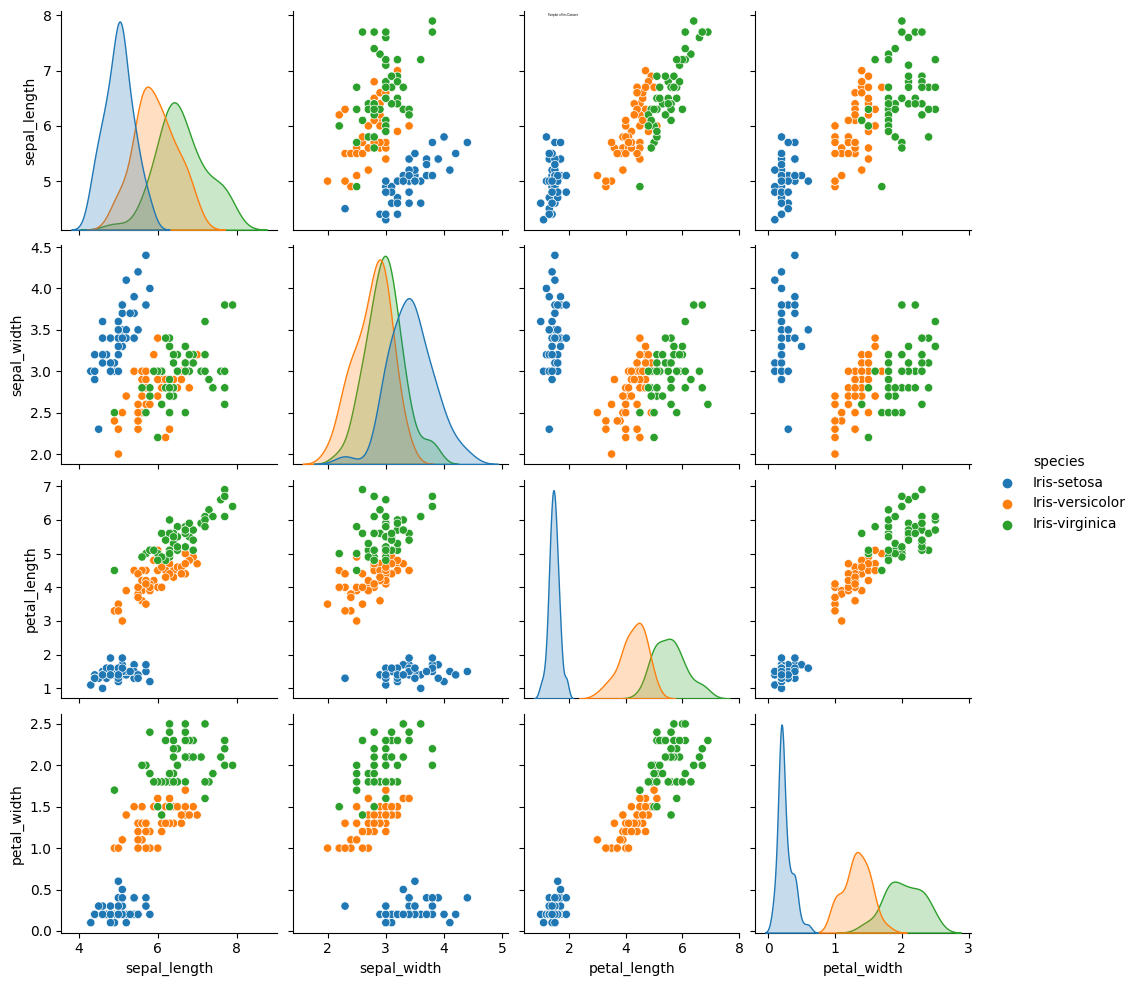

In [27]:
# pairplot
sns.pairplot(data=df, hue='species')
plt.suptitle("Pairplot of Iris Dataset", size=2)
plt.show()

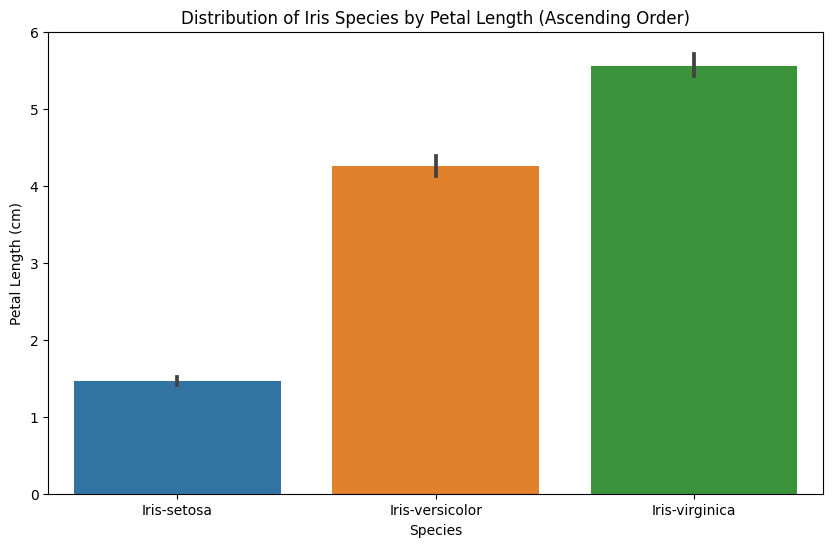

In [28]:
# Sort species by median petal length in ascending order
sorted_species = df.groupby('species')['petal_length'].median().sort_values().index

# Create a grouped bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='species', y='petal_length', order=sorted_species)
plt.title('Distribution of Iris Species by Petal Length (Ascending Order)')
plt.xlabel('Species')
plt.ylabel('Petal Length (cm)')
plt.show()

In [30]:
df.replace({"species": {"Iris-setosa": 1, "Iris-versicolor": 2, "Iris-virginica": 3}}, inplace=True)

In [31]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width,species
sepal_length,1.000000,-0.109321,0.871305,0.817058,0.782904
sepal_width,-0.109321,1.000000,-0.421057,-0.356376,-0.418348
petal_length,0.871305,-0.421057,1.000000,0.961883,0.948339
petal_width,0.817058,-0.356376,0.961883,1.000000,0.955693
species,0.782904,-0.418348,0.948339,0.955693,1.000000


CORELATION MATRIX

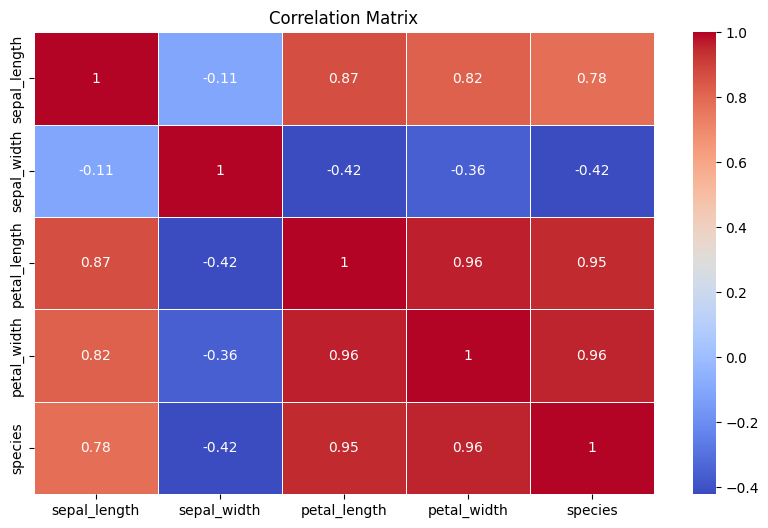

In [32]:
# Calculate the correlation matrix for numerical features
correlation_matrix = df.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

In [33]:
X = df.drop('species', axis=1)
y = df['species']

In [36]:
print("The head of x dataframe is \n",x.head(),"\n")
print("The head of y dataframe is \n",y.head())

The head of x dataframe is 
    sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa 

The head of y dataframe is 
 0    1
1    1
2    1
3    1
4    1
Name: species, dtype: int64


FEATURE SCALLING

In [42]:
# scale
scaler = MinMaxScaler()
x = scaler.fit_transform(X)

# Define the column names based on your original DataFrame
column_names = df.columns[:-1]  # Exclude the 'species' column

# Create a DataFrame from the scaled X
x_scaled = pd.DataFrame(X, columns=column_names)

# Check the first few rows of the scaled data
x_scaled.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [43]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

TRAIN-TEST SPLIT

In [44]:
# Split the data into training and testing data 
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.3, random_state=42)

<H4>MODELLING<h4>

LOGISTIC REGRESSION

In [45]:
# Create a Logistic Regression model
model = LogisticRegression(max_iter=1000)

# Train the model on the training data
model.fit(x_train, y_train)

# Make predictions on both training and test data
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

In [46]:
# Calculate training and test accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")

Training Accuracy: 0.99
Test Accuracy: 0.93


In [47]:
# Print classification report and confusion matrix for the test data
class_names = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
report = classification_report(y_test, y_test_pred, target_names=class_names)
confusion = confusion_matrix(y_test, y_test_pred)
print("Classification Report (Test Data):\n", report)
print("Confusion Matrix (Test Data):\n", confusion)

Classification Report (Test Data):
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        17
Iris-versicolor       0.85      0.92      0.88        12
 Iris-virginica       0.93      0.88      0.90        16

       accuracy                           0.93        45
      macro avg       0.93      0.93      0.93        45
   weighted avg       0.94      0.93      0.93        45

Confusion Matrix (Test Data):
 [[17  0  0]
 [ 0 11  1]
 [ 0  2 14]]


SUPPORT VECTOR CLASSIFIER

In [49]:
# Create an SVM model
model = SVC(kernel='linear')

# Train the model on the training data
model.fit(x_train, y_train)

# Make predictions on both training and test data
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

In [50]:
# Calculate training and test accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")

Training Accuracy: 1.00
Test Accuracy: 0.98


In [51]:
# Print classification report and confusion matrix for the test data
class_names = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
report = classification_report(y_test, y_test_pred, target_names=class_names)
confusion = confusion_matrix(y_test, y_test_pred)
print("Classification Report (Test Data):\n", report)
print("Confusion Matrix (Test Data):\n", confusion)

Classification Report (Test Data):
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        17
Iris-versicolor       1.00      0.92      0.96        12
 Iris-virginica       0.94      1.00      0.97        16

       accuracy                           0.98        45
      macro avg       0.98      0.97      0.98        45
   weighted avg       0.98      0.98      0.98        45

Confusion Matrix (Test Data):
 [[17  0  0]
 [ 0 11  1]
 [ 0  0 16]]


RandomForestClassifier

In [52]:
# Create a Random Forest classifier model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
model.fit(x_train, y_train)

# Make predictions on both training and test data
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

In [53]:
# Calculate training and test accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")

Training Accuracy: 1.00
Test Accuracy: 0.96


In [54]:
# Print classification report and confusion matrix for the test data
class_names = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
report = classification_report(y_test, y_test_pred, target_names=class_names)
confusion = confusion_matrix(y_test, y_test_pred)
print("Classification Report (Test Data):\n", report)
print("Confusion Matrix (Test Data):\n", confusion)

Classification Report (Test Data):
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        17
Iris-versicolor       0.92      0.92      0.92        12
 Iris-virginica       0.94      0.94      0.94        16

       accuracy                           0.96        45
      macro avg       0.95      0.95      0.95        45
   weighted avg       0.96      0.96      0.96        45

Confusion Matrix (Test Data):
 [[17  0  0]
 [ 0 11  1]
 [ 0  1 15]]


DECISION TREE CLASSIFIER

In [60]:
model = DecisionTreeClassifier()

# Train the model on the training data
model.fit(x_train, y_train)

# Make predictions on both training and test data
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

In [61]:
# Calculate training and test accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")

Training Accuracy: 1.00
Test Accuracy: 0.98


In [62]:
# Print classification report and confusion matrix for the test data
class_names = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
report = classification_report(y_test, y_test_pred, target_names=class_names)
confusion = confusion_matrix(y_test, y_test_pred)
print("Classification Report (Test Data):\n", report)
print("Confusion Matrix (Test Data):\n", confusion)

Classification Report (Test Data):
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        17
Iris-versicolor       1.00      0.92      0.96        12
 Iris-virginica       0.94      1.00      0.97        16

       accuracy                           0.98        45
      macro avg       0.98      0.97      0.98        45
   weighted avg       0.98      0.98      0.98        45

Confusion Matrix (Test Data):
 [[17  0  0]
 [ 0 11  1]
 [ 0  0 16]]


MODEL COMPARISON

In [63]:
# Create a Random Forest classifier
rf_classifier = RandomForestClassifier()

# Define the hyperparameters and their possible values to search
param_grid = {
    'n_estimators': [10, 50, 100, 200],  # Number of trees
    'max_depth': [None, 10, 20, 30],   # Maximum depth of trees
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4]     # Minimum samples required in a leaf node
}

# Create a GridSearchCV object to search for the best hyperparameters
grid_search = GridSearchCV(rf_classifier, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to your data
grid_search.fit(x_train, y_train)  

# Get the best parameters found by the grid search
best_params = grid_search.best_params_

# Create a Random Forest model with the best parameters
best_rf_model = RandomForestClassifier(**best_params)

# Fit the model to your training data
best_rf_model.fit(x_train, y_train)

RandomForestClassifier(min_samples_leaf=4, min_samples_split=5, n_estimators=10)

In [64]:
# Evaluate the model on the training data
train_predictions = best_rf_model.predict(x_train)
train_accuracy = best_rf_model.score(x_train, y_train)
train_confusion = confusion_matrix(y_train, train_predictions)
train_classification_report = classification_report(y_train, train_predictions, target_names=class_names)

# Evaluate the model on the test data
test_predictions = best_rf_model.predict(x_test)
test_accuracy = best_rf_model.score(x_test, y_test)
test_confusion = confusion_matrix(y_test, test_predictions)
test_classification_report = classification_report(y_test, test_predictions, target_names=class_names)

In [65]:
# Display the evaluation results
print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

print("\nConfusion Matrix (Training Data):\n", train_confusion)
print("\nClassification Report (Training Data):\n", train_classification_report)

Training Accuracy: 0.9803921568627451
Test Accuracy: 0.9555555555555556

Confusion Matrix (Training Data):
 [[31  0  0]
 [ 0 37  1]
 [ 0  1 32]]

Classification Report (Training Data):
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        31
Iris-versicolor       0.97      0.97      0.97        38
 Iris-virginica       0.97      0.97      0.97        33

       accuracy                           0.98       102
      macro avg       0.98      0.98      0.98       102
   weighted avg       0.98      0.98      0.98       102



In [66]:
print("\nConfusion Matrix (Test Data):\n", test_confusion)
print("\nClassification Report (Test Data):\n", test_classification_report)


Confusion Matrix (Test Data):
 [[17  0  0]
 [ 0 11  1]
 [ 0  1 15]]

Classification Report (Test Data):
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        17
Iris-versicolor       0.92      0.92      0.92        12
 Iris-virginica       0.94      0.94      0.94        16

       accuracy                           0.96        45
      macro avg       0.95      0.95      0.95        45
   weighted avg       0.96      0.96      0.96        45



FINDING THE MOST IMPORTANT FEATURE FOR THE PREDICTION

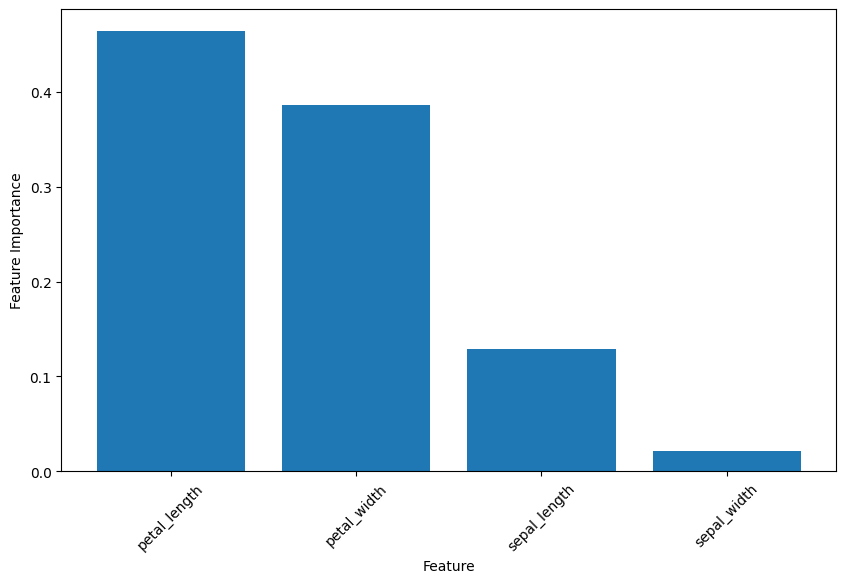

In [67]:
# Get feature importances from the trained Random Forest model
feature_importances = best_rf_model.feature_importances_

feature_names = x_scaled.columns
# Sort the features by importance in descending order
sorted_indices = np.argsort(feature_importances)[::-1]
sorted_feature_names = [feature_names[i] for i in sorted_indices]
sorted_importances = [feature_importances[i] for i in sorted_indices]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_feature_names)), sorted_importances)
plt.xticks(range(len(sorted_feature_names)), sorted_feature_names, rotation=45)
plt.xlabel("Feature")
plt.ylabel("Feature Importance")
plt.show()

CONCLUSION

THE DATASET HAS BEEN TRAINED AND TESTED.
THE PREDICTIONS HAS BEEN DONE SUCCESSFULLY.
MOST REQUIRED FEATURE FOR THE PREDICTION IS 'petal_length'